In [38]:
import scipy as sc
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
folder_path = '/u/home/j/jjeon6/FMT-evolution/Jooeun/Calculated_Pi_MinCoverage4/'
file_names = os.listdir(folder_path)

zip_files = list(filter(lambda file_name: file_name.endswith('Summary_Stats_Sidekick.csv.bz2'), file_names))
pidf = pd.DataFrame(columns=['species','Genomewide_pi','Genomewide_pi_variable_sites','Mean_depth','n_total_loci'])

for x in zip_files:
    file_path = "%s%s" % (folder_path, x)
    tempdf = pd.read_csv(file_path)
    new_row = {
    'species': x,
    'Genomewide_pi': tempdf.iloc[0, 1],
    'Genomewide_pi_variable_sites': tempdf.iloc[0, 2],
    'Mean_depth': tempdf.iloc[0, 3],
    'n_total_loci': tempdf.iloc[0, 4]
    }
    pidf = pidf.append(new_row, ignore_index=True)

In [40]:
pidf['run_accession'] = pidf['species'].str.split('SampleID1_').str[-1].str.strip()
pidf['run_accession'] = pidf['run_accession'].str.split('_Pi', expand=True)[0].str.strip()
pidf['species'] = pidf['species'].str.replace('Strain_', '')
pidf['species'] = pidf['species'].str.split('_SampleID', expand=True)[0].str.strip()
pidf

,species,Genomewide_pi,Genomewide_pi_variable_sites,Mean_depth,n_total_loci,run_accession
0,Adlercreutzia_equolifaciens_60310,0.000200,0.421729,7.375182,324384,SRR9092059
1,Akkermansia_muciniphila_55290,0.000027,0.495875,6.069647,832680,SRR9091969
2,Akkermansia_muciniphila_55290,0.000025,0.382100,10.328797,1384941,SRR9091970
3,Akkermansia_muciniphila_55290,0.000018,0.453820,7.050741,1080687,SRR9091968
4,Alistipes_putredinis_61533,0.000170,0.537344,5.665519,341203,SRR9092117
5,Actinomyces_urogenitalis_53864,0.000087,0.170185,42.412199,1489389,SRR9092110
6,Alistipes_putredinis_61533,0.000026,0.468800,6.079065,724572,SRR9092033
7,Alistipes_putredinis_61533,0.000055,0.492171,6.535741,780805,SRR9091989
8,Alistipes_onderdonkii_55464,0.004878,0.527787,6.136957,1044642,SRR9092023
9,Bacteroides_fragilis_54507,0.000000,NaN,4.242695,3251,SRR9092063


In [41]:
data_dir = "/u/project/ngarud/Garud_lab/metagenomic_fastq_files/Aggarwala_2021/merged_data/species/"
data_dir2 = "/u/home/j/jjeon6/FMT-evolution/Jooeun/"
aggrawala_metadata_path = "%s%s" % (data_dir2, "aggrawala_metadata.txt")
sample_metadata_path = "%s%s" % (data_dir2, "sample_metadata.csv")
relative_abundance_path = "%s%s" % (data_dir, "relative_abundance.txt.bz2")

In [42]:
relab_df = pd.read_csv(relative_abundance_path, sep = "\t")
relab_df[:5]

,species_id,SRR15123483,SRR15089618,SRR15123484,SRR15089621,SRR15089613,SRR15089611,SRR15089623,SRR15089615,SRR15089627,...,SRR15123554,SRR15123555,SRR15123558,SRR15123559,SRR15123560,SRR15123561,SRR15123562,SRR15123563,SRR15123564,SRR15123565
0,Yaniella_halotolerans_59132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Thermodesulfovibrio_thiophilus_59110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bradyrhizobium_sp_59283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Rhodopseudomonas_palustris_61217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Porphyromonas_sp_60792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
aggrawala_df = pd.read_csv(aggrawala_metadata_path, sep = "\t")
aggrawala_df[:10]

,sample_accession,sample_id,Description,Additional.helpful.description,Sample.name.used.internally.in.our.records,X.2.x,run_accession,experiment_accession,study_accession,tax_id,scientific_name,read_count,fastq_ftp,sra_ftp,host_species,host_id
1,SAMN15803867,3rdseq_Bov_1,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,3rdseq_Bov_1,NaN,SRR15089630,SRX11399498,PRJNA637878,749906,gut metagenome,2335219,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/030/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/030/SRR15089630,mouse,3rdseq_Bov_1
2,SAMN15803868,3rdseq_Bov_2,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,3rdseq_Bov_2,NaN,SRR15089629,SRX11399499,PRJNA637878,749906,gut metagenome,2163586,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/029/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/029/SRR15089629,mouse,3rdseq_Bov_2
3,SAMN15803869,3rdseq_Bov_3,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,3rdseq_Bov_3,NaN,SRR15089618,SRX11399510,PRJNA637878,749906,gut metagenome,2852418,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/018/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/018/SRR15089618,mouse,3rdseq_Bov_3
4,SAMN15803870,3rdseq_Bov_4,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,3rdseq_Bov_4,NaN,SRR15089610,SRX11399518,PRJNA637878,749906,gut metagenome,2429383,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/010/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/010/SRR15089610,mouse,3rdseq_Bov_4
5,SAMN15803871,3rdseq_Bov_5,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,3rdseq_Bov_5,NaN,SRR15089609,SRX11399519,PRJNA637878,749906,gut metagenome,1993487,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/009/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/009/SRR15089609,mouse,3rdseq_Bov_5
6,SAMN15803872,hl1175mock_1,"Gnotobiotic mouse with human library 1, Replic...",Used in Figure 1a and described in more detail...,hl1175mock_1,NaN,SRR15089608,SRX11399520,PRJNA637878,749906,gut metagenome,1314257,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/008/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/008/SRR15089608,mouse,hl1175mock_1
7,SAMN15803873,hl1175mock_2,"Gnotobiotic mouse with human library 1, Replic...",Used in Figure 1a and described in more detail...,hl1175mock_2,NaN,SRR15089607,SRX11399521,PRJNA637878,749906,gut metagenome,1276209,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/007/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/007/SRR15089607,mouse,hl1175mock_2
8,SAMN15803874,hl1175mock_3,"Gnotobiotic mouse with human library 1, Replic...",Used in Figure 1a and described in more detail...,hl1175mock_3,NaN,SRR15089606,SRX11399522,PRJNA637878,749906,gut metagenome,1514519,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/006/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/006/SRR15089606,mouse,hl1175mock_3
9,SAMN15803875,hl1175mock_4,"Gnotobiotic mouse with human library 1, Replic...",Used in Figure 1a and described in more detail...,hl1175mock_4,NaN,SRR15089605,SRX11399523,PRJNA637878,749906,gut metagenome,1291209,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/005/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/005/SRR15089605,mouse,hl1175mock_4
10,SAMN15803876,hl1175mock_5,"Gnotobiotic mouse with human library 1, Replic...",Used in Figure 1a and described in more detail...,hl1175mock_5,NaN,SRR15089604,SRX11399524,PRJNA637878,749906,gut metagenome,1605452,ftp.sra.ebi.ac.uk/vol1/fastq/SRR150/004/SRR150...,ftp.sra.ebi.ac.uk/vol1/srr/SRR150/004/SRR15089604,mouse,hl1175mock_5


In [44]:
sample_df = pd.read_csv(sample_metadata_path, sep = ",")
sample_df = sample_df.drop(sample_df.columns[[5, 6, 7]], axis=1)

sample_df.rename(columns={'Metagenomics ID used in data dump':'sample_id'}, inplace=True)
sample_df[:5]

,sample_id,Description,Additional helpful description,Accession number,Sample name used internally in our records
0,3rdseq_Bov_1,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,SAMN15803867,3rdseq_Bov_1
1,3rdseq_Bov_2,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,SAMN15803868,3rdseq_Bov_2
2,3rdseq_Bov_3,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,SAMN15803869,3rdseq_Bov_3
3,3rdseq_Bov_4,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,SAMN15803870,3rdseq_Bov_4
4,3rdseq_Bov_5,"Gnotobiotic mouse with B ovatus strain H, Repl...",Used in Figure 1a and described in more detail...,SAMN15803871,3rdseq_Bov_5


In [45]:
pd.set_option("max_rows", None)
#left join sample_df and aggrawala_df by sample_id
df = pd.merge(sample_df,aggrawala_df,on='sample_id', how='left')
#drop rows with descriptions that contain mouse
df = df[df["Description_x"].str.contains("mouse") == False]
df = df.drop(df.columns[[4, 5, 6, 7, 8]], axis=1)
df = df.drop(df.columns[[4, 8, 9, 10, 11]], axis=1)
df = df.drop(df.columns[[7, 8]], axis=1)
df = df.drop(df.columns[[3, 5, 6]], axis=1)
df

,sample_id,Description_x,Additional helpful description,run_accession,host_id
27,1001099B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123565,1001099
28,1001262B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123564,1001262
29,1001271B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123553,1001271
30,1001275B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123542,1001275
31,1001713B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123531,1001713
32,1001283B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123520,1001283
33,1001136B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123509,1001136
34,1001302B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123498,1001302
35,1001175B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123487,1001175
36,D43_t1,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123481,D43


### Calculating the Alpha Diversity

In [46]:
alphas = [] # a list to store all the alpha values
samples = df['run_accession'] # converting all the sample ids into a list to help looping
for sample in samples:
    # not all the samples have an entry in the alpha abundances
    if sample in relab_df:
        # getting the relative abundaces for each sample
        abundance_vec = relab_df[sample] 
        sample_abundances = [x for x in abundance_vec if x != 0]
        # calculating alpha and adding to list
        alpha = -np.sum(pd.Series(sample_abundances)*np.log(pd.Series(sample_abundances)))
        alphas.append(alpha)
    else:
        alphas.append(np.nan)
df['alpha_diversity'] = alphas
df

,sample_id,Description_x,Additional helpful description,run_accession,host_id,alpha_diversity
27,1001099B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123565,1001099,3.489702
28,1001262B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123564,1001262,3.541826
29,1001271B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123553,1001271,3.703519
30,1001275B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123542,1001275,3.307436
31,1001713B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123531,1001713,NaN
32,1001283B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123520,1001283,3.462290
33,1001136B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123509,1001136,NaN
34,1001302B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123498,1001302,3.024221
35,1001175B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123487,1001175,NaN
36,D43_t1,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123481,D43,3.106254


In [47]:
df.dropna(subset=['alpha_diversity'], inplace = True) #dropping samples without alpha diversity
df["category"] = np.nan
df = df.drop([36,89,53]) #dropping year 5 data or donors
df = df.drop([42,45]) #dropping patients without after FMT data
df

,sample_id,Description_x,Additional helpful description,run_accession,host_id,alpha_diversity,category
27,1001099B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123565,1001099,3.489702,NaN
28,1001262B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123564,1001262,3.541826,NaN
29,1001271B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123553,1001271,3.703519,NaN
30,1001275B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123542,1001275,3.307436,NaN
32,1001283B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123520,1001283,3.462290,NaN
34,1001302B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123498,1001302,3.024221,NaN
37,1001095A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123563,1001095,1.848202,NaN
38,1001270B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123562,1001270,2.908097,NaN
39,1001216B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123561,1001216,2.734999,NaN
40,1001254A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123560,1001254,1.924574,NaN


### Creating New columns

In [48]:
df.rename(columns={'Additional helpful description':'additional_info'}, inplace=True)
df["category"] = np.where(df.Description_x.str.contains("Healthy"), "donor",
                   np.where(df.Description_x.str.contains("Patient with"), "before",
                   np.where(df.additional_info.str.contains("Provides"), "donor",
                   np.where(df.additional_info.str.contains("Just before"), "before",
                   np.where(df.additional_info.str.contains("1 week"), "1w",
                   np.where(df.additional_info.str.contains("4 weeks"), "4w",
                   np.where(df.additional_info.str.contains("8 weeks"), "8w",
                   np.where(df.additional_info.str.contains("6 months"), "6m",          
                   np.where(df.additional_info.str.contains("1 year"), "1y",
                   np.where(df.additional_info.str.contains("5 year"), "5y",
                   np.where(df.additional_info.str.contains("48 hours post"), "48h",
                   np.where(df.additional_info.str.contains("24 hours post"), "24h", "no data"))))))))))))
#column of time data
df["success"] = np.nan
df["success"] = np.where(df.sample_id.str.contains("270"), "Y",
                   np.where(df.sample_id.str.contains("095"), "N",
                   np.where(df.sample_id.str.contains("166"), "Y",
                   np.where(df.sample_id.str.contains("216"), "N",
                   np.where(df.sample_id.str.contains("254"), "Y",
                   np.where(df.sample_id.str.contains("274"), "Y",
                   np.where(df.sample_id.str.contains("282"), "Y",
                   np.where(df.sample_id.str.contains("285"), "Y",          
                   np.where(df.sample_id.str.contains("286"), "Y",
                   np.where(df.sample_id.str.contains("287"), "Y",
                   np.where(df.sample_id.str.contains("295"), "N",
                   np.where(df.sample_id.str.contains("311"), "N",
                   np.where(df.sample_id.str.contains("298"), "Y", "")))))))))))))
#column of successful and nonsuccessful data
df["donor"] = np.nan
df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor
27,1001099B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123565,1001099,3.489702,donor,,NaN
28,1001262B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123564,1001262,3.541826,donor,,NaN
29,1001271B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123553,1001271,3.703519,donor,,NaN
30,1001275B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123542,1001275,3.307436,donor,,NaN
32,1001283B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123520,1001283,3.462290,donor,,NaN
34,1001302B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123498,1001302,3.024221,donor,,NaN
37,1001095A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123563,1001095,1.848202,before,N,NaN
38,1001270B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123562,1001270,2.908097,before,Y,NaN
39,1001216B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123561,1001216,2.734999,before,N,NaN
40,1001254A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123560,1001254,1.924574,before,Y,NaN


In [49]:
recipients = []
for index, row in df.iterrows():
    if "Healthy" in row['Description_x']:
        recipients.append(np.nan)
    elif "Patient" in row['Description_x']:
        recipients.append(row['sample_id'][:-1])
    elif "Donor 1001217 sample" in row['Description_x']:
        recipients.append(np.nan)
    elif "FMT recipient" in row['Description_x']:
        ids = re.findall(r'\d+', row['Description_x'])
        recipients.append(ids[0])
        
df['recipient_id'] = recipients

In [50]:
df_yes = df[df["success"].str.contains("Y") == True]
df_no = df[df["success"].str.contains("N") == True]

### Graph for successful patients

In [51]:
df_yes2 = df_yes['alpha_diversity'].groupby(df_yes['category'])
df_yes2 = df_yes2.apply(pd.DataFrame)
df_yes2 = df_yes2.reindex(['donor', 'before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'], axis ='columns')
df_yes2 = df_yes2.dropna(axis=1,how='all')
df_yes2 = df_yes2.apply(lambda x: pd.Series(x.dropna().values))
df_yes2


,before,24h,48h,1w,4w,8w,6m,1y,5y
0,2.908097,2.702263,3.052604,3.548777,3.758324,3.576153,3.562072,3.442832,3.449476
1,1.924574,3.434664,3.794203,3.370107,3.151615,3.788320,3.589070,3.237263,3.174107
2,3.242886,NaN,NaN,3.487903,3.015065,3.495276,2.828366,NaN,NaN
3,2.215220,NaN,NaN,2.983976,3.553179,3.351528,2.994849,NaN,NaN
4,1.055921,NaN,NaN,3.680397,2.941063,3.543061,NaN,NaN,NaN
5,2.592357,NaN,NaN,3.255485,2.722769,2.904302,NaN,NaN,NaN
6,2.751541,NaN,NaN,3.007604,3.352509,1.968669,NaN,NaN,NaN
7,2.382345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.986539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


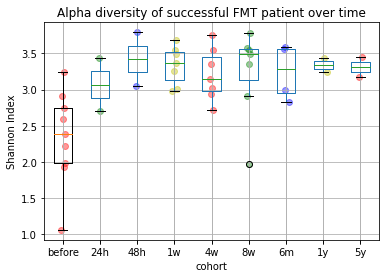

In [52]:
df_yes2.boxplot(column=['before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'])
vals, names, xs = [],[],[]
for i, col in enumerate(df_yes2.columns):
    vals.append(df_yes2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df_yes2[col].values.shape[0])) 

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y', 'r','g']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.xlabel("cohort")
plt.ylabel("Shannon Index")
plt.title("Alpha diversity of successful FMT patient over time")
plt.show()

### Graph for unsuccessful patients

In [53]:
df_no2 = df_no['alpha_diversity'].groupby(df_no['category'])
df_no2 = df_no2.apply(pd.DataFrame)
df_no2 = df_no2.reindex(['donor', 'before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'], axis ='columns')
df_no2 = df_no2.dropna(axis=1,how='all')
df_no2 = df_no2.apply(lambda x: pd.Series(x.dropna().values))
df_no2

,before,1w,4w,8w,6m,1y,5y
0,1.848202,3.339354,3.126256,2.781920,3.299468,3.405976,3.439996
1,2.734999,3.459874,3.202837,3.279247,3.176039,NaN,NaN
2,2.544485,3.673891,NaN,3.686548,NaN,NaN,NaN
3,1.229166,1.966612,NaN,3.158587,NaN,NaN,NaN


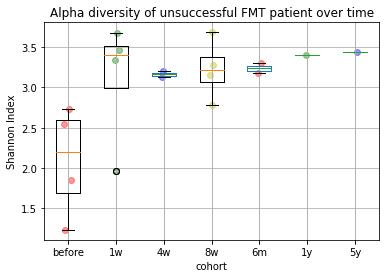

In [54]:
df_no2.boxplot(column=['before', '1w', '4w', '8w', '6m', '1y', '5y'])
vals, names, xs = [],[],[]
for i, col in enumerate(df_no2.columns):
    vals.append(df_no2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df_no2[col].values.shape[0])) 

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y', 'r','g']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.xlabel("cohort")
plt.ylabel("Shannon Index")
plt.title("Alpha diversity of unsuccessful FMT patient over time")
plt.show()

### For All patients

In [76]:
joined_df = pd.merge(df, pidf, on='run_accession')

In [77]:
joined_df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id,donor_accession,beta,before_accession,beta_before,species,Genomewide_pi,Genomewide_pi_variable_sites,Mean_depth,n_total_loci


In [75]:
df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id,donor_accession,beta,before_accession,beta_before
46,1001270D,FMT recipient 1001270 from Donor 1001271B,24 hours post FMT,SRR15123554,1001270,2.702263,24h,Y,1001271,1001270,SRR15123553,0.837477,SRR15123562,0.445976
47,1001270F,FMT recipient 1001270 from Donor 1001271B,1 week post FMT,SRR15123552,1001270,3.548777,1w,Y,1001271,1001270,SRR15123553,0.401746,SRR15123562,0.690000
48,1001270G,FMT recipient 1001270 from Donor 1001271B,4 weeks post FMT,SRR15123551,1001270,3.758324,4w,Y,1001271,1001270,SRR15123553,0.370060,SRR15123562,0.821055
49,1001270H,FMT recipient 1001270 from Donor 1001271B,8 weeks post FMT,SRR15123550,1001270,3.576153,8w,Y,1001271,1001270,SRR15123553,0.457133,SRR15123562,0.872922
50,1001270I,FMT recipient 1001270 from Donor 1001271B,6 months post FMT,SRR15123549,1001270,3.562072,6m,Y,1001271,1001270,SRR15123553,0.388184,SRR15123562,0.837848
51,1001270J,FMT recipient 1001270 from Donor 1001271B,1 year post FMT,SRR15123548,1001270,3.442832,1y,Y,1001271,1001270,SRR15123553,0.440259,SRR15123562,0.843397
54,1001095F,FMT recipient 1001099 from Donor 1001099B,1 week post FMT,SRR15123546,1001095,3.339354,1w,N,1001099,1001095,SRR15123565,0.626413,SRR15123563,0.994822
55,1001095G,FMT recipient 1001099 from Donor 1001099B,4 weeks post FMT,SRR15123545,1001095,3.126256,4w,N,1001099,1001095,SRR15123565,0.571350,SRR15123563,0.991051
56,1001095H,FMT recipient 1001099 from Donor 1001099B,8 weeks post FMT,SRR15123544,1001095,2.781920,8w,N,1001099,1001095,SRR15123565,0.801147,SRR15123563,0.965284
57,1001095I,FMT recipient 1001099 from Donor 1001099B,6 months post FMT,SRR15123543,1001095,3.299468,6m,N,1001099,1001095,SRR15123565,0.657655,SRR15123563,0.995740


In [56]:
df2 = df['alpha_diversity'].groupby(df['category'])
df2 = df2.apply(pd.DataFrame)
df2 = df2.reindex(['donor', 'before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'], axis ='columns')
df2 = df2.apply(lambda x: pd.Series(x.dropna().values))
df2

,donor,before,24h,48h,1w,4w,8w,6m,1y,5y
0,3.489702,1.848202,2.702263,3.052604,3.548777,3.758324,3.576153,3.562072,3.442832,3.439996
1,3.541826,2.908097,3.434664,3.794203,3.339354,3.126256,2.781920,3.299468,3.405976,3.449476
2,3.703519,2.734999,NaN,NaN,3.370107,3.151615,3.788320,3.176039,3.237263,3.174107
3,3.307436,1.924574,NaN,NaN,3.459874,3.202837,3.279247,3.589070,NaN,NaN
4,3.462290,2.544485,NaN,NaN,3.487903,3.015065,3.495276,2.828366,NaN,NaN
5,3.024221,3.242886,NaN,NaN,2.983976,3.553179,3.351528,2.994849,NaN,NaN
6,2.983542,2.215220,NaN,NaN,3.680397,2.941063,3.543061,NaN,NaN,NaN
7,NaN,1.055921,NaN,NaN,3.255485,2.722769,2.904302,NaN,NaN,NaN
8,NaN,2.592357,NaN,NaN,3.673891,3.352509,3.686548,NaN,NaN,NaN
9,NaN,2.751541,NaN,NaN,3.007604,NaN,1.968669,NaN,NaN,NaN


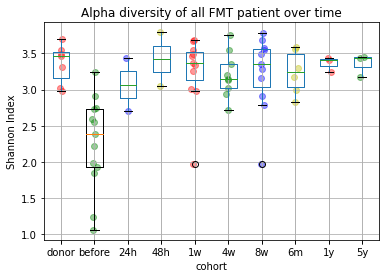

In [57]:
df2.boxplot(column=['donor', 'before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'])
vals, names, xs = [],[],[]
for i, col in enumerate(df2.columns):
    vals.append(df2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df2[col].values.shape[0])) 

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y', 'r','g']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.xlabel("cohort")
plt.ylabel("Shannon Index")
plt.title("Alpha diversity of all FMT patient over time")
plt.show()

In [58]:
df[df["category"] == "donor"]

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id
27,1001099B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123565,1001099,3.489702,donor,,NaN,NaN
28,1001262B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123564,1001262,3.541826,donor,,NaN,NaN
29,1001271B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123553,1001271,3.703519,donor,,NaN,NaN
30,1001275B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123542,1001275,3.307436,donor,,NaN,NaN
32,1001283B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123520,1001283,3.462290,donor,,NaN,NaN
34,1001302B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123498,1001302,3.024221,donor,,NaN,NaN
64,1001217B,Donor 1001217 sample,Provides sample to recipient 1001216,SRR15123535,1001217,2.983542,donor,,NaN,NaN


In [59]:
df.loc[27:34, "donor"] = "donor"
df.loc[37, "donor"] = "1001099"
df.loc[38, "donor"] = "1001271"
df.loc[39, "donor"] = "1001217"
df.loc[40, "donor"] = "1001262"
df.loc[41, "donor"] = "1001283"
df.loc[46:63, "donor"] = df.loc[46:63, 'Description_x'].apply(lambda x: x[-8:-1])
df.loc[64, "donor"] = "donor"
df.loc[65:117, "donor"] = df.loc[65:117, 'Description_x'].apply(lambda x: x[-7:])
df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id
27,1001099B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123565,1001099,3.489702,donor,,donor,NaN
28,1001262B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123564,1001262,3.541826,donor,,donor,NaN
29,1001271B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123553,1001271,3.703519,donor,,donor,NaN
30,1001275B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123542,1001275,3.307436,donor,,donor,NaN
32,1001283B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123520,1001283,3.462290,donor,,donor,NaN
34,1001302B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123498,1001302,3.024221,donor,,donor,NaN
37,1001095A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123563,1001095,1.848202,before,N,1001099,1001095
38,1001270B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123562,1001270,2.908097,before,Y,1001271,1001270
39,1001216B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123561,1001216,2.734999,before,N,1001217,1001216
40,1001254A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123560,1001254,1.924574,before,Y,1001262,1001254


In [60]:
df['donor_accession'] = np.nan
for index, row in df.iterrows():
    for index2, row2 in df.iterrows():
        if row['donor'] in row2['sample_id']:
            df.loc[index, "donor_accession"] = row2['run_accession']
df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id,donor_accession
27,1001099B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123565,1001099,3.489702,donor,,donor,NaN,NaN
28,1001262B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123564,1001262,3.541826,donor,,donor,NaN,NaN
29,1001271B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123553,1001271,3.703519,donor,,donor,NaN,NaN
30,1001275B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123542,1001275,3.307436,donor,,donor,NaN,NaN
32,1001283B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123520,1001283,3.462290,donor,,donor,NaN,NaN
34,1001302B,Healthy human donor,"Used in Figure 1b,c and described in more deta...",SRR15123498,1001302,3.024221,donor,,donor,NaN,NaN
37,1001095A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123563,1001095,1.848202,before,N,1001099,1001095,SRR15123565
38,1001270B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123562,1001270,2.908097,before,Y,1001271,1001270,SRR15123553
39,1001216B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123561,1001216,2.734999,before,N,1001217,1001216,SRR15123535
40,1001254A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123560,1001254,1.924574,before,Y,1001262,1001254,SRR15123564


In [61]:
df.dropna(subset=['donor_accession'], inplace = True)
betas = []
samples_1 = df['run_accession'] # converting all the sample ids into a list to help looping
samples_2 = df['donor_accession']
for s1, s2 in zip(samples_1, samples_2):
    # not all the samples have an entry in the alpha abundances
        abundance_vec1 = relab_df[s1] 
        abundance_vec2 = relab_df[s2] 
        # calculating beta and adding to list
        beta = sc.spatial.distance.braycurtis(abundance_vec1, abundance_vec2)
        betas.append(beta)
df['beta'] = betas
df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id,donor_accession,beta
37,1001095A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123563,1001095,1.848202,before,N,1001099,1001095,SRR15123565,0.996626
38,1001270B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123562,1001270,2.908097,before,Y,1001271,1001270,SRR15123553,0.825019
39,1001216B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123561,1001216,2.734999,before,N,1001217,1001216,SRR15123535,0.980637
40,1001254A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123560,1001254,1.924574,before,Y,1001262,1001254,SRR15123564,0.992906
41,1001295B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123559,1001295,2.544485,before,N,1001283,1001295,SRR15123520,0.984785
46,1001270D,FMT recipient 1001270 from Donor 1001271B,24 hours post FMT,SRR15123554,1001270,2.702263,24h,Y,1001271,1001270,SRR15123553,0.837477
47,1001270F,FMT recipient 1001270 from Donor 1001271B,1 week post FMT,SRR15123552,1001270,3.548777,1w,Y,1001271,1001270,SRR15123553,0.401746
48,1001270G,FMT recipient 1001270 from Donor 1001271B,4 weeks post FMT,SRR15123551,1001270,3.758324,4w,Y,1001271,1001270,SRR15123553,0.370060
49,1001270H,FMT recipient 1001270 from Donor 1001271B,8 weeks post FMT,SRR15123550,1001270,3.576153,8w,Y,1001271,1001270,SRR15123553,0.457133
50,1001270I,FMT recipient 1001270 from Donor 1001271B,6 months post FMT,SRR15123549,1001270,3.562072,6m,Y,1001271,1001270,SRR15123553,0.388184


### Beta compared to donor

In [62]:
df2 = df['beta'].groupby(df['category'])
df2 = df2.apply(pd.DataFrame)
df2 = df2.reindex(['before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'], axis ='columns')
df2 = df2.apply(lambda x: pd.Series(x.dropna().values))
df2

,before,24h,48h,1w,4w,8w,6m,1y,5y
0,0.996626,0.837477,0.676367,0.401746,0.370060,0.457133,0.388184,0.440259,0.724548
1,0.825019,0.615437,0.461145,0.626413,0.571350,0.801147,0.657655,0.664558,0.670772
2,0.980637,NaN,NaN,0.745151,0.648903,0.604550,0.581808,0.569138,0.606229
3,0.992906,NaN,NaN,0.466200,0.548474,0.404202,0.462872,NaN,NaN
4,0.984785,NaN,NaN,0.529365,0.373951,0.724197,0.894632,NaN,NaN
5,0.990393,NaN,NaN,0.373409,0.422011,0.409554,0.668912,NaN,NaN
6,0.994641,NaN,NaN,0.606707,0.627333,0.661564,NaN,NaN,NaN
7,0.996570,NaN,NaN,0.320411,0.677624,0.417951,NaN,NaN,NaN
8,0.894207,NaN,NaN,0.813524,NaN,0.825733,NaN,NaN,NaN
9,0.975790,NaN,NaN,0.978174,NaN,0.728234,NaN,NaN,NaN


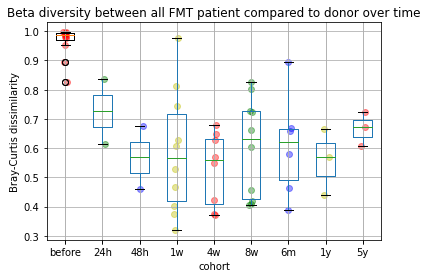

In [63]:
df2.boxplot(column=[ 'before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'])
vals, names, xs = [],[],[]
for i, col in enumerate(df2.columns):
    vals.append(df2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df2[col].values.shape[0])) 

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y', 'r','g']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.xlabel("cohort")
plt.ylabel("Bray-Curtis dissimilarity")
plt.title("Beta diversity between all FMT patient compared to donor over time")
plt.show()

### Beta compared to pre-FMT

In [64]:
df.dropna(subset=['recipient_id'], inplace = True) # dropping donors
# fixing the typo error FMT recipient 1001099 from Donor 1001099B
for index, row in df.iterrows():
    if 'FMT recipient 1001099' in row['Description_x']:
        df.loc[index, "recipient_id"] = '1001095'
# matching before_accession to the columns
df['before_accession'] = np.nan
for index, row in df.iterrows():
    for index2, row2 in df.iterrows(): # find the location of the donor
        if row['recipient_id'] in row2['sample_id'] and row2['category'] == 'before':
            df.loc[index, "before_accession"] = row2['run_accession']
df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id,donor_accession,beta,before_accession
37,1001095A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123563,1001095,1.848202,before,N,1001099,1001095,SRR15123565,0.996626,SRR15123563
38,1001270B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123562,1001270,2.908097,before,Y,1001271,1001270,SRR15123553,0.825019,SRR15123562
39,1001216B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123561,1001216,2.734999,before,N,1001217,1001216,SRR15123535,0.980637,SRR15123561
40,1001254A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123560,1001254,1.924574,before,Y,1001262,1001254,SRR15123564,0.992906,SRR15123529
41,1001295B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123559,1001295,2.544485,before,N,1001283,1001295,SRR15123520,0.984785,SRR15123559
46,1001270D,FMT recipient 1001270 from Donor 1001271B,24 hours post FMT,SRR15123554,1001270,2.702263,24h,Y,1001271,1001270,SRR15123553,0.837477,SRR15123562
47,1001270F,FMT recipient 1001270 from Donor 1001271B,1 week post FMT,SRR15123552,1001270,3.548777,1w,Y,1001271,1001270,SRR15123553,0.401746,SRR15123562
48,1001270G,FMT recipient 1001270 from Donor 1001271B,4 weeks post FMT,SRR15123551,1001270,3.758324,4w,Y,1001271,1001270,SRR15123553,0.370060,SRR15123562
49,1001270H,FMT recipient 1001270 from Donor 1001271B,8 weeks post FMT,SRR15123550,1001270,3.576153,8w,Y,1001271,1001270,SRR15123553,0.457133,SRR15123562
50,1001270I,FMT recipient 1001270 from Donor 1001271B,6 months post FMT,SRR15123549,1001270,3.562072,6m,Y,1001271,1001270,SRR15123553,0.388184,SRR15123562


In [65]:
df.dropna(subset=['before_accession'], inplace = True) 
betas = []
samples_1 = df['run_accession'] # converting all the sample ids into a list to help looping
samples_2 = df['before_accession']
for s1, s2 in zip(samples_1, samples_2):
    # not all the samples have an entry in the alpha abundances
        abundance_vec1 = relab_df[s1] 
        abundance_vec2 = relab_df[s2] 
        # calculating beta and adding to list
        beta = sc.spatial.distance.braycurtis(abundance_vec1, abundance_vec2)
        betas.append(beta)
df['beta_before'] = betas
df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id,donor_accession,beta,before_accession,beta_before
37,1001095A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123563,1001095,1.848202,before,N,1001099,1001095,SRR15123565,0.996626,SRR15123563,0.000000
38,1001270B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123562,1001270,2.908097,before,Y,1001271,1001270,SRR15123553,0.825019,SRR15123562,0.000000
39,1001216B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123561,1001216,2.734999,before,N,1001217,1001216,SRR15123535,0.980637,SRR15123561,0.000000
40,1001254A,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123560,1001254,1.924574,before,Y,1001262,1001254,SRR15123564,0.992906,SRR15123529,0.357509
41,1001295B,Patient with rCDI and prior to FMT,Used in Figure 1c and described in more detail...,SRR15123559,1001295,2.544485,before,N,1001283,1001295,SRR15123520,0.984785,SRR15123559,0.000000
46,1001270D,FMT recipient 1001270 from Donor 1001271B,24 hours post FMT,SRR15123554,1001270,2.702263,24h,Y,1001271,1001270,SRR15123553,0.837477,SRR15123562,0.445976
47,1001270F,FMT recipient 1001270 from Donor 1001271B,1 week post FMT,SRR15123552,1001270,3.548777,1w,Y,1001271,1001270,SRR15123553,0.401746,SRR15123562,0.690000
48,1001270G,FMT recipient 1001270 from Donor 1001271B,4 weeks post FMT,SRR15123551,1001270,3.758324,4w,Y,1001271,1001270,SRR15123553,0.370060,SRR15123562,0.821055
49,1001270H,FMT recipient 1001270 from Donor 1001271B,8 weeks post FMT,SRR15123550,1001270,3.576153,8w,Y,1001271,1001270,SRR15123553,0.457133,SRR15123562,0.872922
50,1001270I,FMT recipient 1001270 from Donor 1001271B,6 months post FMT,SRR15123549,1001270,3.562072,6m,Y,1001271,1001270,SRR15123553,0.388184,SRR15123562,0.837848


In [66]:
df.drop(df[df['category'] == 'before'].index, inplace=True) #drop "before" data

In [67]:
df2 = df['beta_before'].groupby(df['category'])
df2 = df2.apply(pd.DataFrame)
df2 = df2.reindex(['24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'], axis ='columns')
df2 = df2.apply(lambda x: pd.Series(x.dropna().values))
df2

,24h,48h,1w,4w,8w,6m,1y,5y
0,0.445976,0.708016,0.690000,0.821055,0.872922,0.837848,0.843397,0.992022
1,0.926994,0.669809,0.994822,0.991051,0.965284,0.995740,0.994261,0.987635
2,NaN,NaN,0.806416,0.867633,0.840355,0.949150,0.992344,0.966851
3,NaN,NaN,0.962712,0.989850,0.983087,0.969184,NaN,NaN
4,NaN,NaN,0.988161,0.986269,0.987396,0.901653,NaN,NaN
5,NaN,NaN,0.841894,0.910865,0.870655,0.857315,NaN,NaN
6,NaN,NaN,0.759179,0.860667,0.920063,NaN,NaN,NaN
7,NaN,NaN,0.913383,NaN,0.383154,NaN,NaN,NaN
8,NaN,NaN,0.711570,NaN,0.885571,NaN,NaN,NaN
9,NaN,NaN,0.862504,NaN,NaN,NaN,NaN,NaN


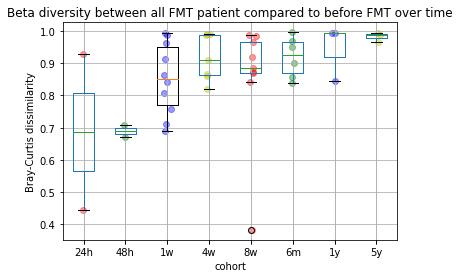

In [68]:
df2.boxplot(column=['24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'])
vals, names, xs = [],[],[]
for i, col in enumerate(df2.columns):
    vals.append(df2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df2[col].values.shape[0])) 

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y', 'r','g']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.xlabel("cohort")
plt.ylabel("Bray-Curtis dissimilarity")
plt.title("Beta diversity between all FMT patient compared to before FMT over time")
plt.show()

In [74]:
joined_df

,sample_id,Description_x,additional_info,run_accession,host_id,alpha_diversity,category,success,donor,recipient_id,donor_accession,beta,before_accession,beta_before,species,Genomewide_pi,Genomewide_pi_variable_sites,Mean_depth,n_total_loci


In [70]:
df2 = joined_df['Genomewide_pi'].groupby(joined_df['category'])
df2 = df2.apply(pd.DataFrame)
df2 = df2.reindex(['donor', 'before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'], axis ='columns')
df2 = df2.apply(lambda x: pd.Series(x.dropna().values))
df2

AttributeError: 'float' object has no attribute 'dropna'

In [ ]:
df2.boxplot(column=['donor', 'before', '24h', '48h', '1w', '4w', '8w', '6m', '1y', '5y'])
vals, names, xs = [],[],[]
for i, col in enumerate(df2.columns):
    vals.append(df2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df2[col].values.shape[0])) 

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y', 'r','g']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.xlabel("cohort")
plt.ylabel("Pi")
plt.title("Pi of all FMT patient over time")
plt.show()